In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
## checking null values 
df.isna().sum()

date       0
Ex_rate    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [5]:
## checking duplicate values
df[df.duplicated()]

,date,Ex_rate


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


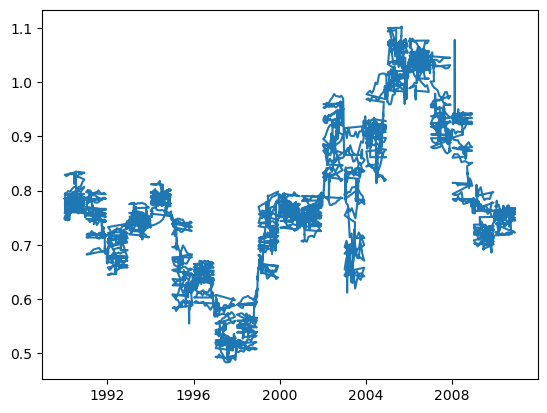

In [8]:
plt.plot(df['date'],df['Ex_rate'])

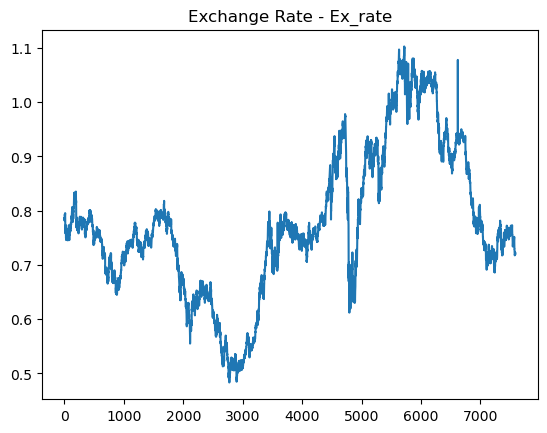

In [9]:
# Plot time series for each currency
for currency in df.columns[1:]:
  df[currency].plot()
  plt.title(f"Exchange Rate - {currency}")
  plt.show()

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1400x700 with 0 Axes>

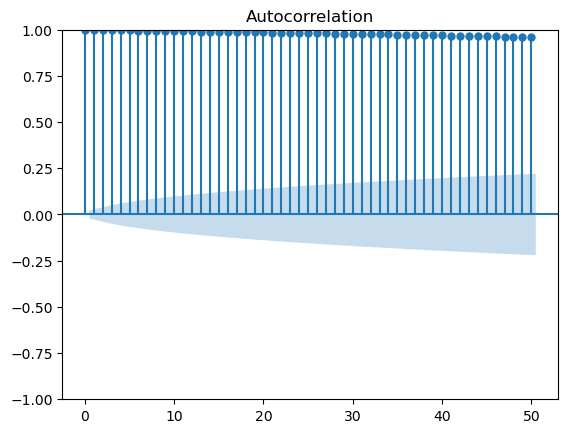

In [11]:
# Plot ACF 
plt.figure(figsize=(14, 7))
plot_acf(df['Ex_rate'], lags=50)
plt.show()

<Figure size 1400x700 with 0 Axes>

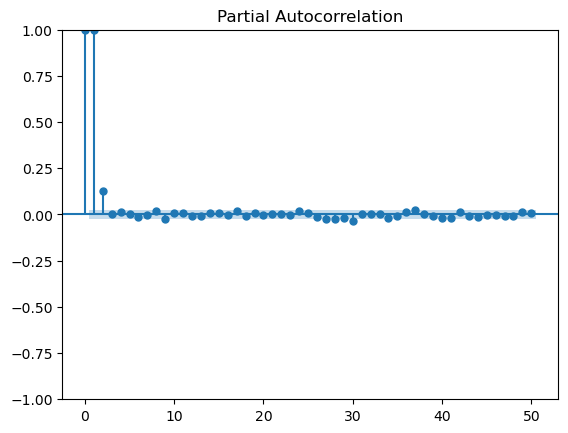

In [12]:
## PACF Plot
plt.figure(figsize=(14, 7))
plot_pacf(df['Ex_rate'], lags=50)
plt.show()

## Model Building

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Set initial parameters
p, d, q = 1, 1, 1 

# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 20 Jun 2024   AIC                         -56102.322
Time:                        15:05:20   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

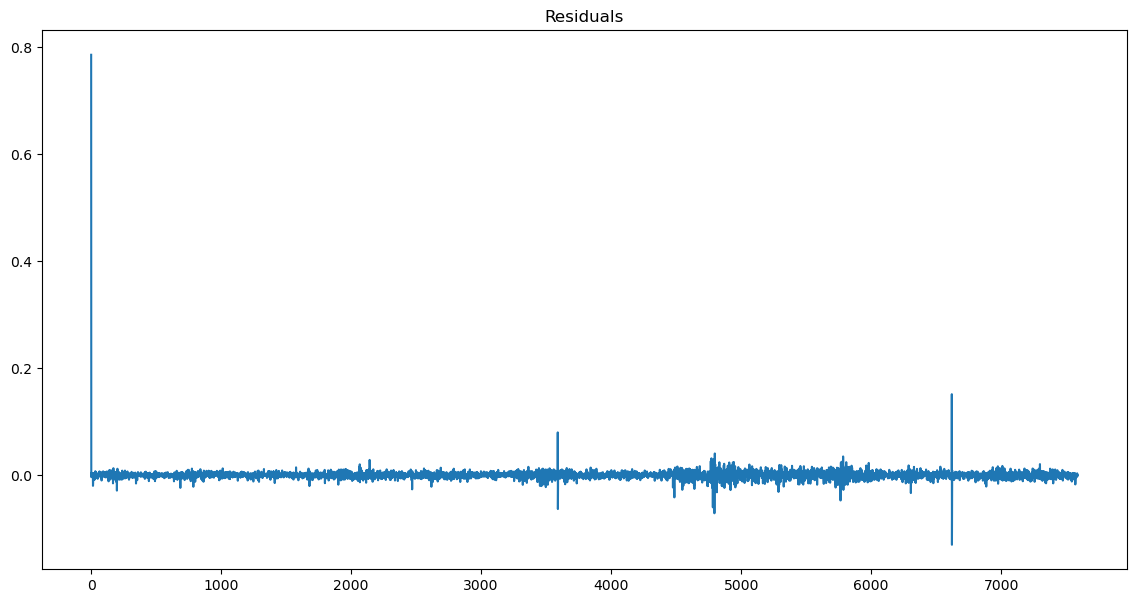

In [14]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

<Figure size 1400x700 with 0 Axes>

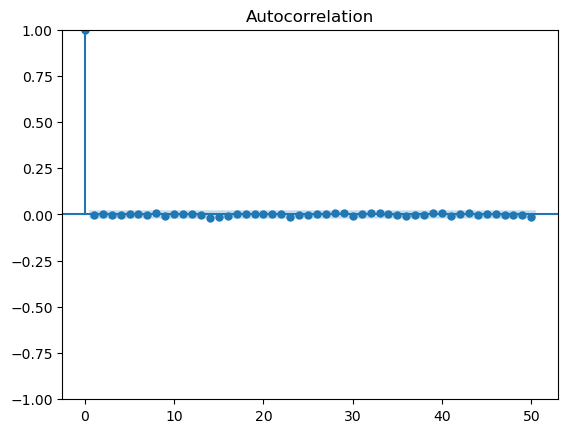

In [15]:
# Plot ACF of residuals
plt.figure(figsize=(14, 7))
plot_acf(residuals, lags=50)
plt.show()

<Figure size 1400x700 with 0 Axes>

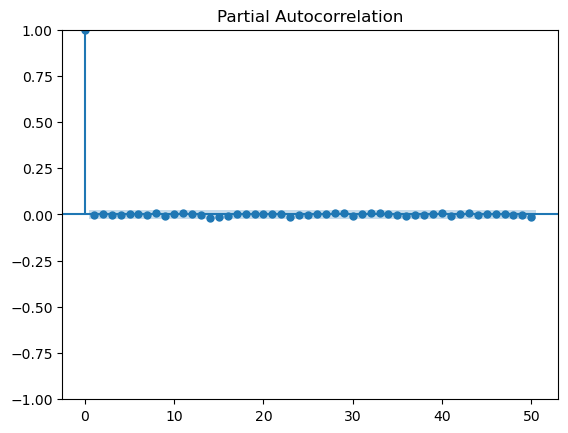

In [16]:
# Plot PACF of residuals
plt.figure(figsize=(14, 7))
plot_pacf(residuals, lags=50)
plt.show()

In [17]:
forecast_steps = 12  
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=forecast_steps+1, closed='right')

C:\Users\SANKET-PC\AppData\Local\Temp\ipykernel_11564\2548049211.py:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df['date'].iloc[-1], periods=forecast_steps+1, closed='right')


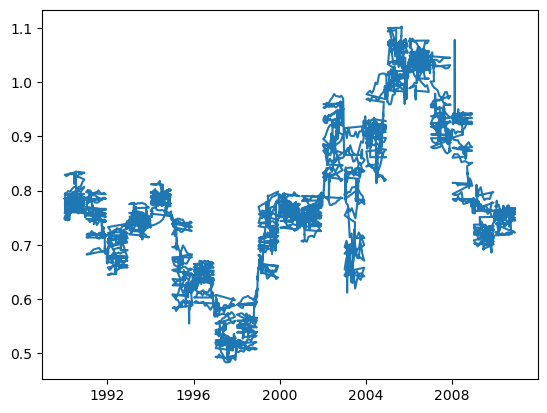

In [18]:
## plotting the actual values
plt.plot(df['date'], df['Ex_rate'], label='Actual')

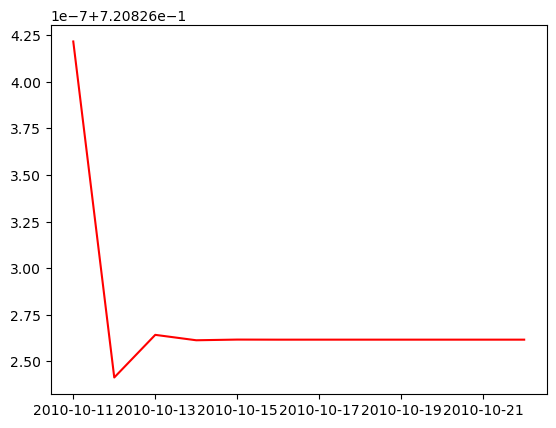

In [19]:
## plotting the forecasting values
plt.plot(forecast_dates, forecast, label='Forecast', color='red')

## Exponential Smoothing

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_es = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12)

In [21]:
model_es_fit = model_es.fit(optimized=True)
print(model_es_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.480
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Thu, 20 Jun 2024
Box-Cox:                          False   Time:                         15:05:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698356                alpha                 True
smoothing_seasonal       

In [22]:
# Forecasting
forecast_es = model_es_fit.forecast(steps=forecast_steps)

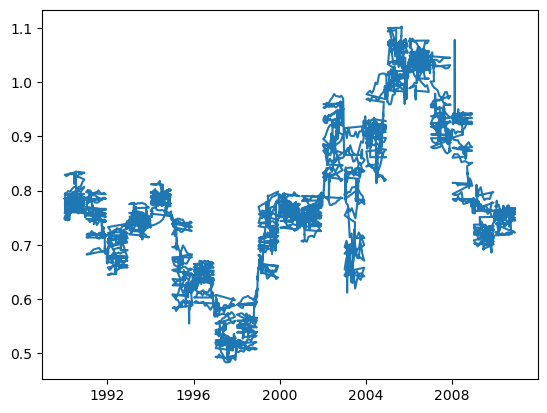

In [23]:
plt.plot(df['date'], df['Ex_rate'], label='Actual')

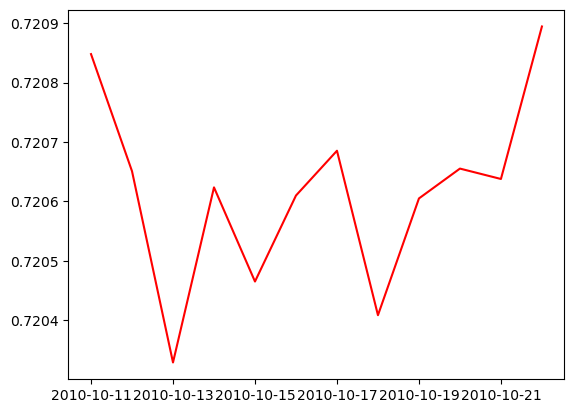

In [24]:
plt.plot(forecast_dates, forecast_es, label='Forecast', color='red')

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
rmse = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast, squared=False)

C:\Users\SANKET-PC\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
mae

0.001664492434046964

In [28]:
rmse

0.002000358073456273

In [29]:
# Compute error metrics for Exponential Smoothing
mae_es = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast_es)
rmse_es = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast_es, squared=False)

print(f'Exponential Smoothing MAE: {mae_es}')
print(f'Exponential Smoothing RMSE: {rmse_es}')


Exponential Smoothing MAE: 0.0015781973742896398
Exponential Smoothing RMSE: 0.0018717506305405425


C:\Users\SANKET-PC\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
